# Influencers in Social Networks

by [Jesus Solano](http://www.jesussolano.com/) -- [Jesus Solano](http://www.jesussolano.com/) -- [Jesus Solano](http://www.jesussolano.com/) -- [Jesus Solano](http://www.jesussolano.com/)


version 1.0, June 13 2018

In [21]:
import pandas as pd
data = pd.read_csv("https://github.com/jesugome/InfluencersInSocialNetworks/raw/master/datasets/train.csv",sep=",")
data.head()

Choice  A_follower_count  A_following_count  A_listed_count  \
0       0               228                302               3   
1       0             21591               1179             228   
2       0              7310               1215             101   
3       0                20                  7               2   
4       1             45589                862            2641   

   A_mentions_received  A_retweets_received  A_mentions_sent  A_retweets_sent  \
0             0.583979             0.100503         0.100503         0.100503   
1            90.456506            25.798292         5.709329         1.111159   
2            25.503644             9.556347         5.361519         0.591206   
3             7.690824             0.277306         1.331508         0.100503   
4           148.854279            36.998884        27.881768         3.333492   

     A_posts  A_network_feature_1         ...           B_following_count  \
0   0.362150                    2         ...                       29808   
1   5.176620                  369         ...                         848   
2   3.589718                   95         ...                         482   
3   2.830627                    6         ...                       17637   
4  23.861282                  551         ...                        1711   

   B_listed_count  B_mentions_received  B_retweets_received  B_mentions_sent  \
0            1689            15.430498             3.984029         8.204331   
1            1610            40.495021             8.943607         3.227677   
2             206             0.734696             0.354379         0.603202   
3             278           572.874856           390.293681        27.552040   
4             181            21.601866             3.581661         6.764657   

   B_retweets_sent    B_posts  B_network_feature_1  B_network_feature_2  \
0         0.332423   6.988815                   66            75.530303   
1         0.564343   1.070321                  163           132.030675   
2         0.100503   0.603202                    3            10.333333   
3         7.167557  32.101906                 1762            23.469296   
4         1.119727   4.563246                   85            48.500000   

   B_network_feature_3  
0          1916.893939  
1          2931.515337  
2           277.333333  
3          1395.845634  
4          1993.627907  

[5 rows x 23 columns]

# Exploratory Analysis

In [10]:
# Import the neccesary libraries and set a seed. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings("ignore")
%matplotlib inline
from PIL import Image

np.random.seed(22)

In [22]:
print ("data shape :",data.shape,"\n")
print ("data info  :",data.info())
print ("\ncolumns  :",data.columns)
print ("\nmissing values :",data.isnull().sum())

data shape : (5500, 23) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 23 columns):
Choice                 5500 non-null int64
A_follower_count       5500 non-null int64
A_following_count      5500 non-null int64
A_listed_count         5500 non-null int64
A_mentions_received    5500 non-null float64
A_retweets_received    5500 non-null float64
A_mentions_sent        5500 non-null float64
A_retweets_sent        5500 non-null float64
A_posts                5500 non-null float64
A_network_feature_1    5500 non-null int64
A_network_feature_2    5500 non-null float64
A_network_feature_3    5500 non-null float64
B_follower_count       5500 non-null int64
B_following_count      5500 non-null int64
B_listed_count         5500 non-null int64
B_mentions_received    5500 non-null float64
B_retweets_received    5500 non-null float64
B_mentions_sent        5500 non-null float64
B_retweets_sent        5500 non-null float64
B_posts                5500 

In [12]:
data.describe()

Choice  A_follower_count  A_following_count  A_listed_count  \
count  5500.000000      5.500000e+03       5.500000e+03     5500.000000   
mean      0.509455      6.498840e+05       1.265895e+04     5952.453273   
std       0.499956      2.028787e+06       4.900867e+04    17339.141191   
min       0.000000      1.600000e+01       0.000000e+00        0.000000   
25%       0.000000      2.663750e+03       3.220000e+02       85.000000   
50%       1.000000      4.558900e+04       7.780000e+02      932.000000   
75%       1.000000      3.927380e+05       2.838000e+03     6734.000000   
max       1.000000      3.654319e+07       1.165830e+06   549144.000000   

       A_mentions_received  A_retweets_received  A_mentions_sent  \
count         5.500000e+03          5500.000000      5500.000000   
mean          2.666032e+03          1032.371839         6.011873   
std           2.916543e+04         10954.953223         9.519797   
min           1.005034e-01             0.100503         0.100503   
25%           3.453649e+00             0.716816         0.359534   
50%           4.876542e+01            14.029113         2.299666   
75%           3.498196e+02           118.704407         7.198330   
max           1.145219e+06        435825.874241        76.809514   

       A_retweets_sent      A_posts  A_network_feature_1         ...           \
count      5500.000000  5500.000000          5500.000000         ...            
mean          1.109924     9.090730          5267.768000         ...            
std           1.910104    18.311060         28946.777345         ...            
min           0.100503     0.100503             0.000000         ...            
25%           0.100503     0.632440            12.000000         ...            
50%           0.341936     3.555194           195.000000         ...            
75%           1.320681    10.691878          1323.000000         ...            
max          16.290540   193.072418        920838.000000         ...            

       B_following_count  B_listed_count  B_mentions_received  \
count        5500.000000     5500.000000         5.500000e+03   
mean        12738.259818     5903.148364         2.554598e+03   
std         50054.520874    16298.462018         2.508873e+04   
min             0.000000        0.000000         1.005034e-01   
25%           322.000000       75.000000         3.260473e+00   
50%           773.000000      890.000000         4.876542e+01   
75%          2838.000000     6734.000000         3.743699e+02   
max        664324.000000   549144.000000         1.145219e+06   

       B_retweets_received  B_mentions_sent  B_retweets_sent      B_posts  \
count          5500.000000      5500.000000      5500.000000  5500.000000   
mean            997.149954         6.099658         1.106236     9.505821   
std            9342.006880         9.729557         1.939914    19.424680   
min               0.100503         0.100503         0.100503     0.100503   
25%               0.714556         0.356943         0.100503     0.822584   
50%              14.029113         2.251398         0.341936     3.342999   
75%             107.081021         6.866840         1.320681    10.600502   
max          435825.874241        76.809514        16.290540   193.072418   

       B_network_feature_1  B_network_feature_2  B_network_feature_3  
count          5500.000000          5500.000000          5500.000000  
mean           5254.933636            85.024196          3745.175480  
std           26778.820125           106.689384          5518.399590  
min               0.000000             0.000000             0.000000  
25%              11.000000            15.176568          1206.500000  
50%             190.000000            54.925234          2206.420734  
75%            1323.000000           112.191489          4349.908608  
max          920838.000000          1861.583333         75526.083333  

[8 rows x 23 columns]

Correlation between variables

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'CORRELATION BETWEEN VARIABLES')

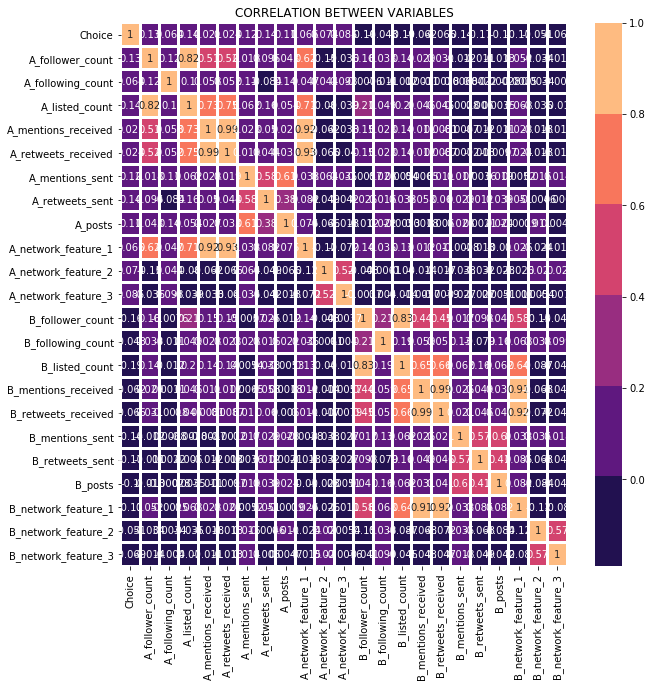

In [130]:
%pylab inline
pylab.rcParams['figure.figsize'] = (30, 60)
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap=sns.color_palette("magma"),linewidth=2,edgecolor="k")
plt.title("CORRELATION BETWEEN VARIABLES")


Proportion of target variable in dataset

Text(0.5,1,'Proportion of target variable in dataset')

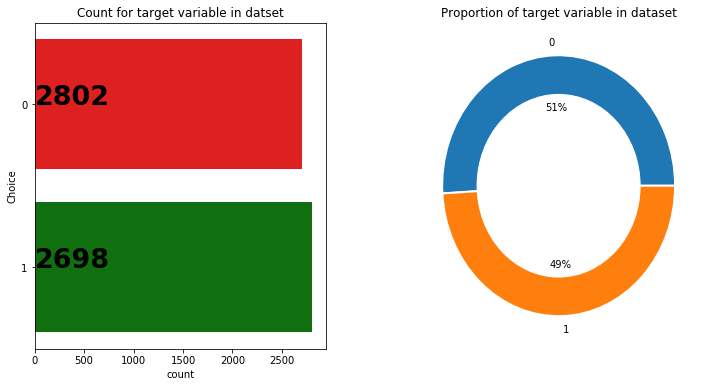

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(121)
ax = sns.countplot(y = data["Choice"],palette=["r","g"])
for i,j in enumerate(data["Choice"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize = 27)
plt.title("Count for target variable in datset")


plt.subplot(122)
plt.pie(data["Choice"].value_counts().values,labels=["0","1"],autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace = .3)
plt.title("Proportion of target variable in dataset")

Text(0.5,1,'COMPARING STANDARD DEVIATION OF ATTRIBUTES FOR TARGET CLASSES')

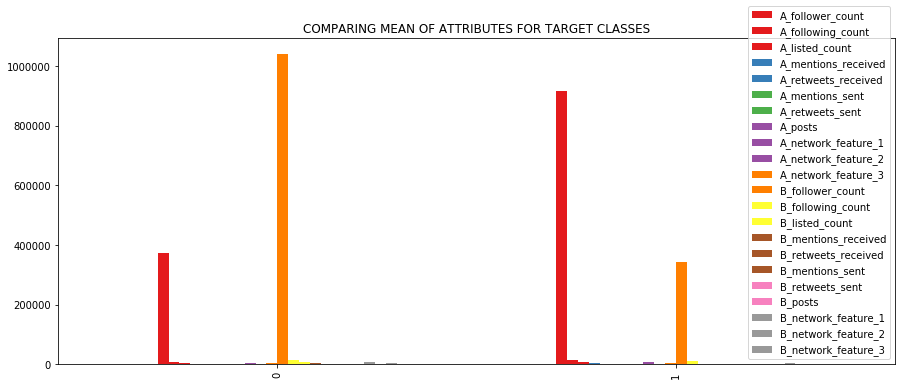

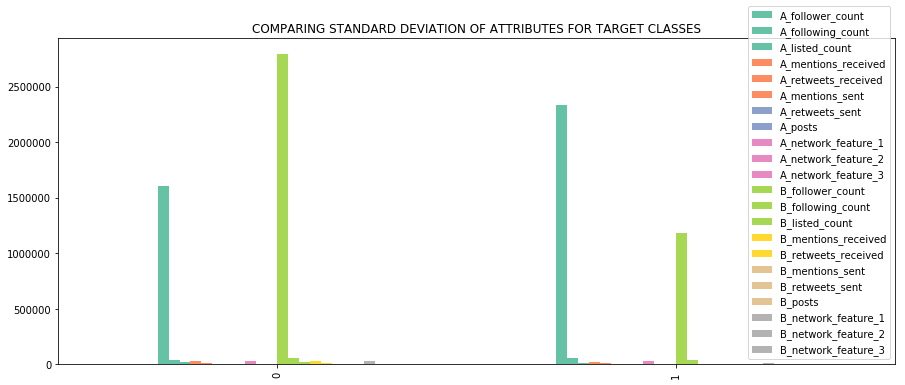

In [27]:
compare = data.groupby("Choice")[['A_follower_count', 'A_following_count', 'A_listed_count', 'A_mentions_received',
                                        'A_retweets_received', 'A_mentions_sent', 'A_retweets_sent',
                                        'A_posts','A_network_feature_1','A_network_feature_2','A_network_feature_3','B_follower_count','B_following_count','B_listed_count','B_mentions_received','B_retweets_received','B_mentions_sent','B_retweets_sent','B_posts','B_network_feature_1','B_network_feature_2','B_network_feature_3']].mean().reset_index()


compare = compare.drop("Choice",axis =1)

compare.plot(kind="bar",width=.6,figsize=(15,6),colormap="Set1")
plt.title("COMPARING MEAN OF ATTRIBUTES FOR TARGET CLASSES")

compare1 = data.groupby("Choice")[['A_follower_count', 'A_following_count', 'A_listed_count', 'A_mentions_received',
                                        'A_retweets_received', 'A_mentions_sent', 'A_retweets_sent',
                                        'A_posts','A_network_feature_1','A_network_feature_2','A_network_feature_3','B_follower_count','B_following_count','B_listed_count','B_mentions_received','B_retweets_received','B_mentions_sent','B_retweets_sent','B_posts','B_network_feature_1','B_network_feature_2','B_network_feature_3']].std().reset_index()
compare1 = compare1.drop("Choice",axis=1)
compare1.plot(kind="bar",width=.6,figsize=(15,6),colormap="Set2")
plt.title("COMPARING STANDARD DEVIATION OF ATTRIBUTES FOR TARGET CLASSES")


[GREEN == 1 , RED == 0]


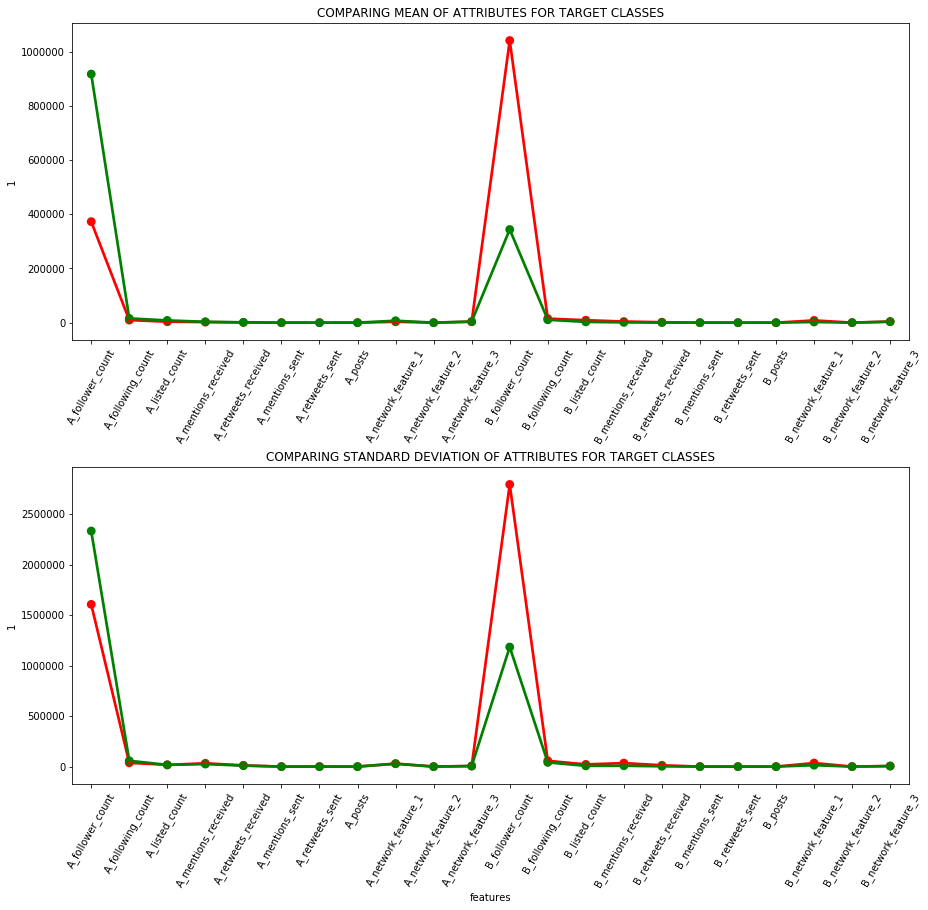

In [30]:
compare_mean = compare.transpose().reset_index()
compare_mean = compare_mean.rename(columns={'index':"features", 0:"0", 1:"1"})
plt.figure(figsize=(15,14))
plt.subplot(211)
sns.pointplot(x= "features",y="0",data=compare_mean,color="r")
sns.pointplot(x= "features",y="1",data=compare_mean,color="g")
plt.xticks(rotation =60)
plt.xlabel("")
plt.title("COMPARING MEAN OF ATTRIBUTES FOR TARGET CLASSES")

compare_std = compare1.transpose().reset_index()
compare_std = compare_std.rename(columns={'index':"features", 0:"0", 1:"1"})
plt.subplot(212)
sns.pointplot(x= "features",y="0",data=compare_std,color="r")
sns.pointplot(x= "features",y="1",data=compare_std,color="g")
plt.xticks(rotation =60)
plt.title("COMPARING STANDARD DEVIATION OF ATTRIBUTES FOR TARGET CLASSES")
plt.subplots_adjust(hspace =.4)

print ("[GREEN == 1 , RED == 0]")

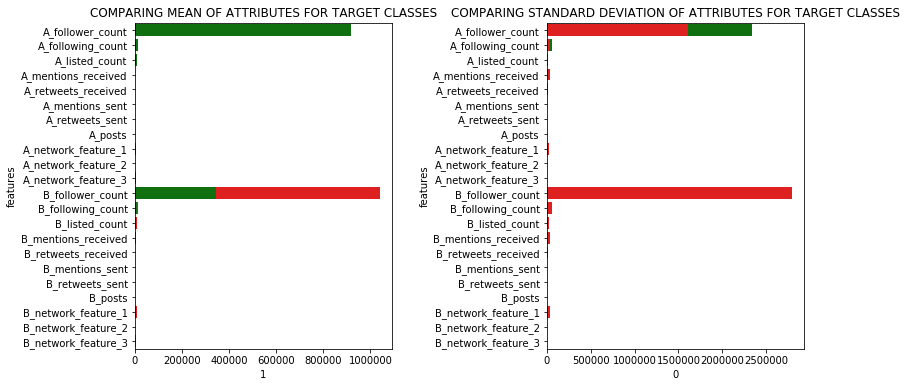

In [32]:
compare_mean
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.barplot(y="features",x="0",data=compare_mean,color="r")
sns.barplot(y="features",x="1",data=compare_mean,color="g")
plt.title("COMPARING MEAN OF ATTRIBUTES FOR TARGET CLASSES")

plt.subplot(122)
sns.barplot(y="features",x="1",data=compare_std,color="g")
sns.barplot(y="features",x="0",data=compare_std,color="r")
plt.title("COMPARING STANDARD DEVIATION OF ATTRIBUTES FOR TARGET CLASSES")
plt.subplots_adjust(wspace =.6)

Distribution of variables in data set

***************************************
DISTIBUTION OF VARIABLES IN DATA SET
***************************************


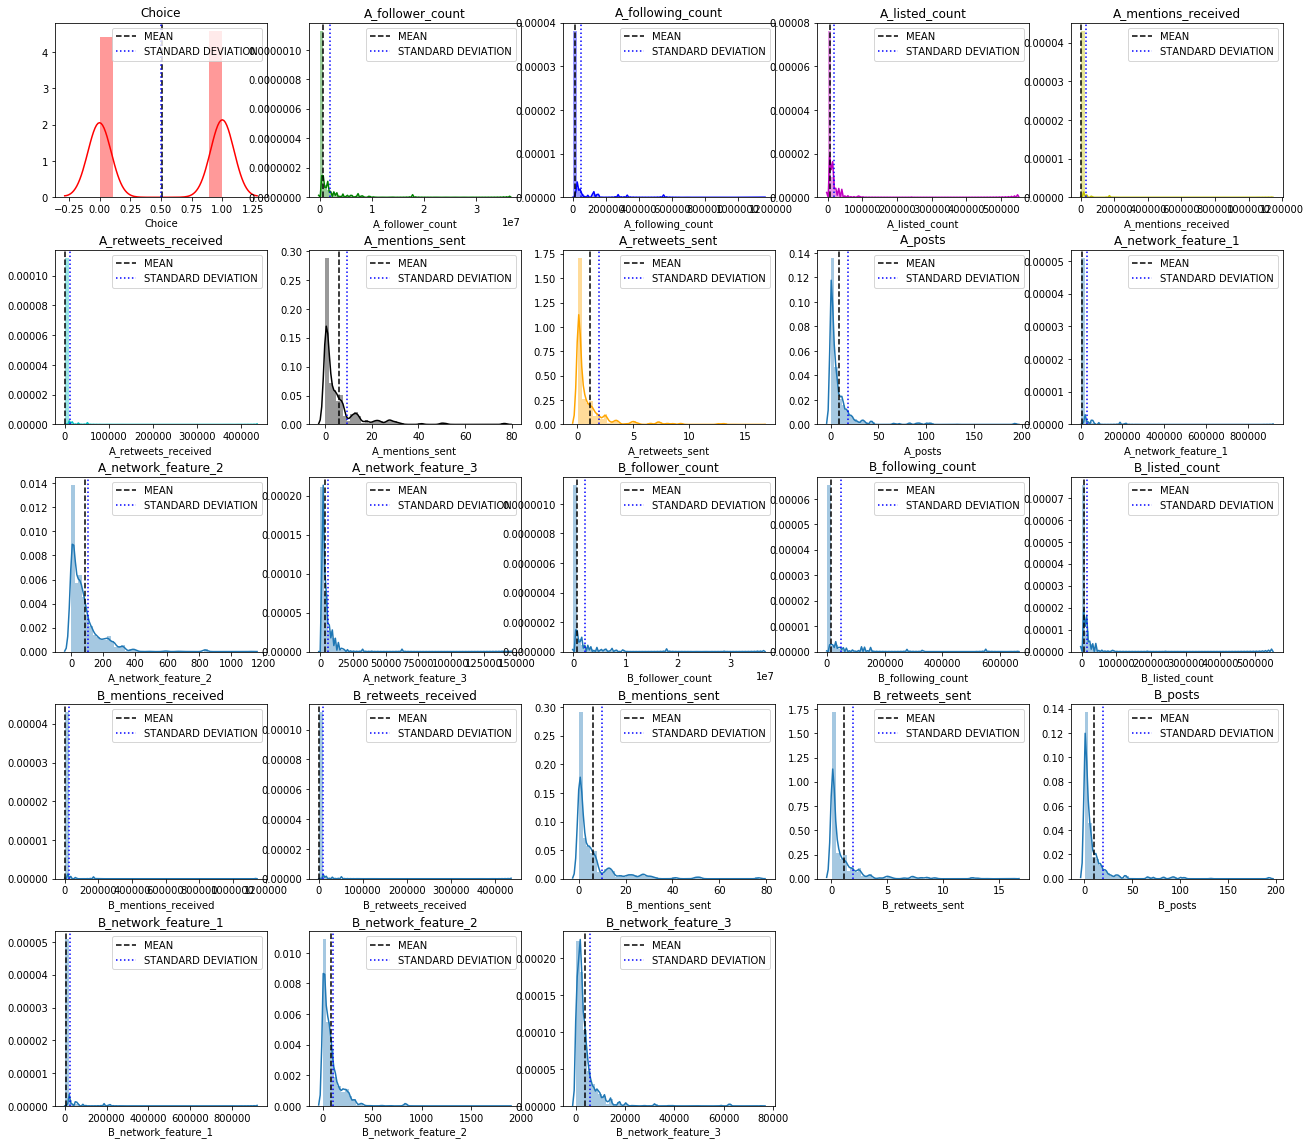

In [47]:
columns = ['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3']
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange"] 

plt.figure(figsize=(22,45))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/4,j+1)
    sns.distplot(data[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(data[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(data[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
    
print ("***************************************")
print ("DISTIBUTION OF VARIABLES IN DATA SET")
print ("***************************************")

Pair plot between all variables

Text(0.5,1,'Pair plot for variables')

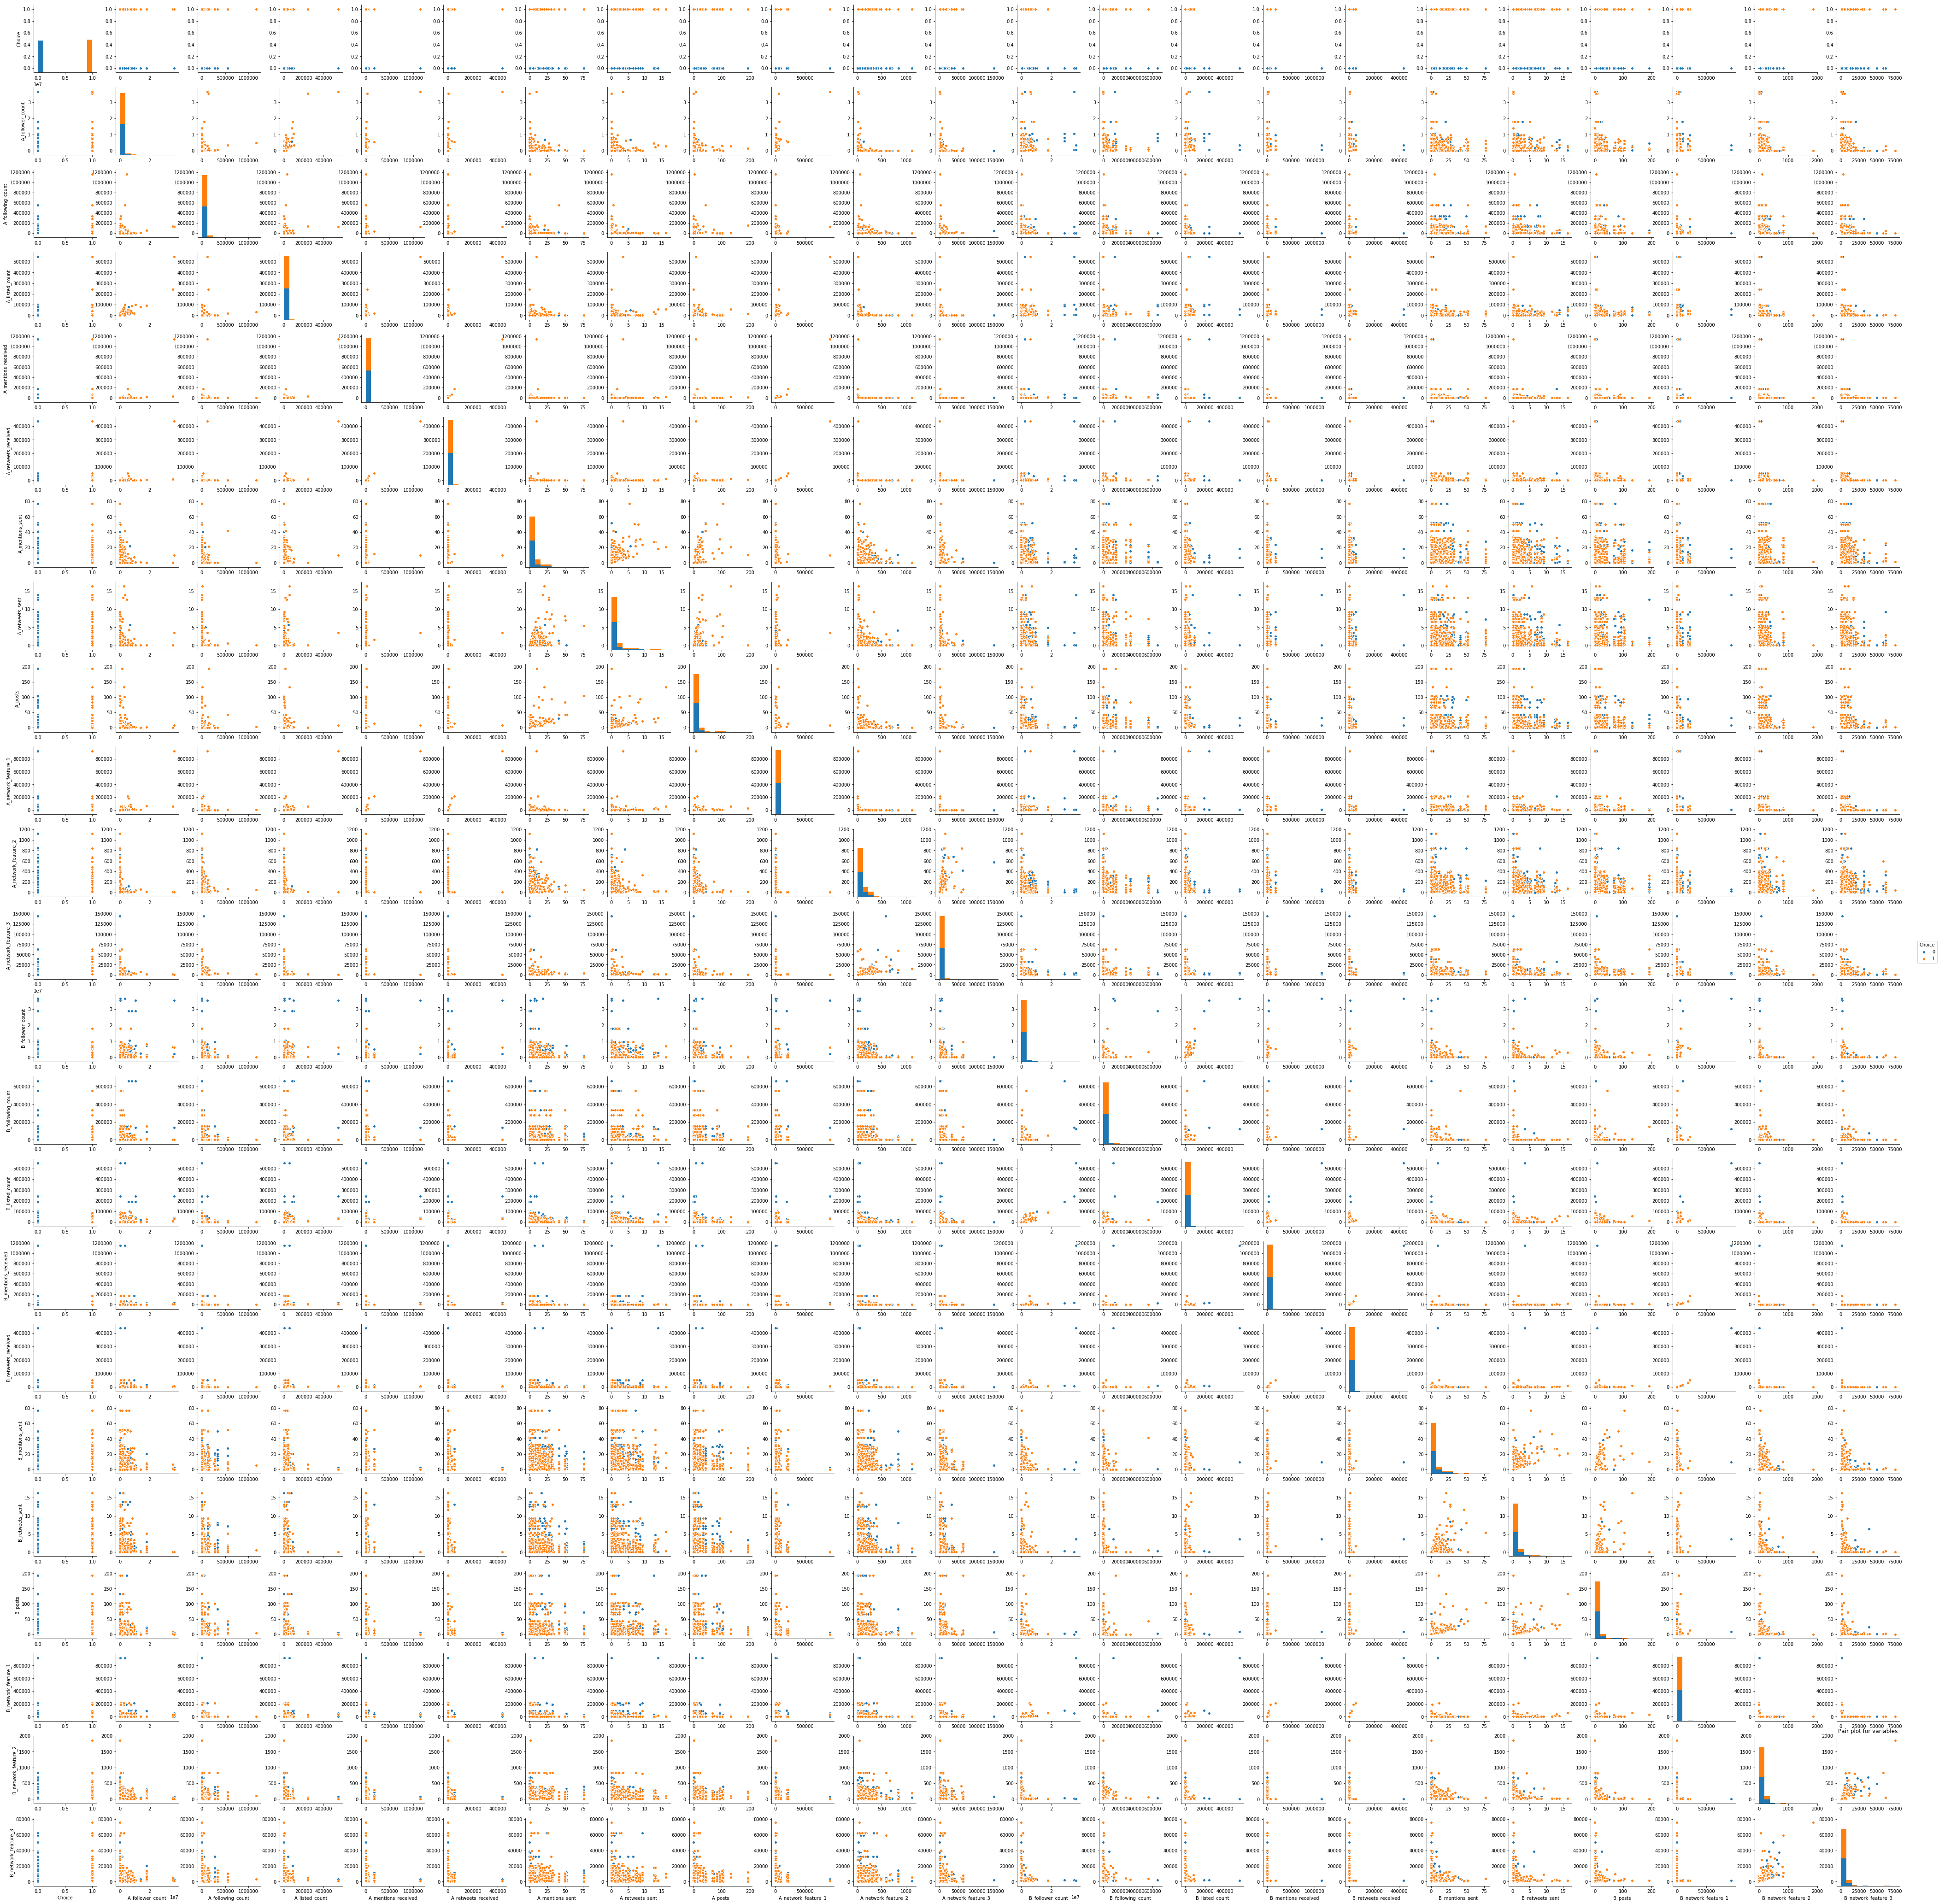

In [52]:
plt.figure(figsize=(500,800))
sns.pairplot(data,hue="Choice")
plt.title("Pair plot for variables")

Scatter plot between variables for target classes

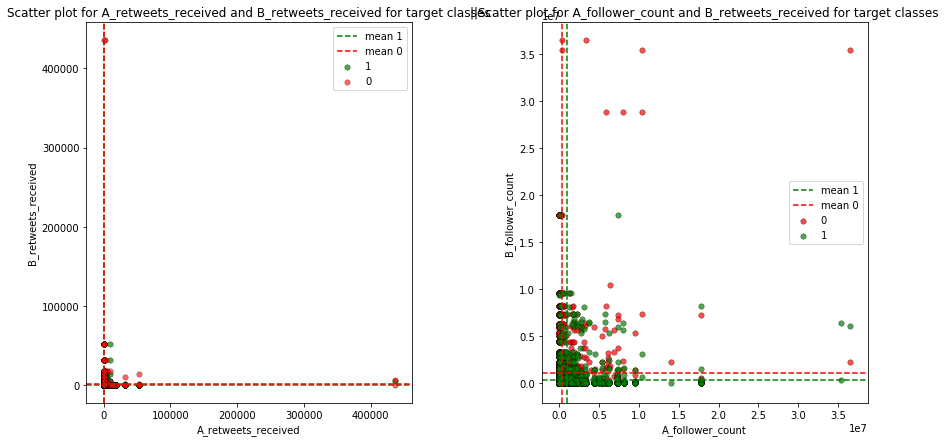

In [57]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.scatter(x = "A_retweets_received",y = "B_retweets_received",data=data[data["Choice"] == 1],alpha=.7,label="1",s=30,color = "g",linewidths=.4,edgecolors="black")
plt.scatter(x = "A_retweets_received",y = "B_retweets_received",data=data[data["Choice"] == 0],alpha=.6,label="0",s=30,color ="r",linewidths=.4,edgecolors="black")
plt.axvline(data[data["Choice"] == 1]["A_retweets_received"].mean(),color = "g",linestyle="dashed",label="mean 1")
plt.axvline(data[data["Choice"] == 0]["A_retweets_received"].mean(),color = "r",linestyle="dashed",label ="mean 0")
plt.axhline(data[data["Choice"] == 1]["B_retweets_received"].mean(),color = "g",linestyle="dashed")
plt.axhline(data[data["Choice"] == 0]["B_retweets_received"].mean(),color = "r",linestyle= "dashed")
plt.legend(loc ="best")
plt.xlabel("A_retweets_received")
plt.ylabel("B_retweets_received")
plt.title("Scatter plot for A_retweets_received and B_retweets_received for target classes")
plt.subplot(122)
plt.scatter(x = "A_follower_count",y = 'B_follower_count',data=data[data["Choice"] == 0],alpha=.7,label="0",s=30,color ="r",linewidths=.4,edgecolors="black")
plt.scatter(x = "A_follower_count",y = 'B_follower_count',data=data[data["Choice"] == 1],alpha=.7,label="1",s=30,color = "g",linewidths=.4,edgecolors="black")
plt.axvline(data[data["Choice"] == 1]["A_follower_count"].mean(),color = "g",linestyle="dashed",label ="mean 1")
plt.axvline(data[data["Choice"] == 0]["A_follower_count"].mean(),color = "r",linestyle="dashed",label ="mean 0")
plt.axhline(data[data["Choice"] == 1]["B_follower_count"].mean(),color = "g",linestyle="dashed")
plt.axhline(data[data["Choice"] == 0]["B_follower_count"].mean(),color = "r",linestyle="dashed")
plt.legend(loc ="best")
plt.xlabel("A_follower_count")
plt.ylabel('B_follower_count')
plt.title("||Scatter plot for A_follower_count and B_retweets_received for target classes")
plt.subplots_adjust(wspace =.4)


Boxplot for variables in the data set with target class

ValueError: num must be 1 <= num <= 8, not 9

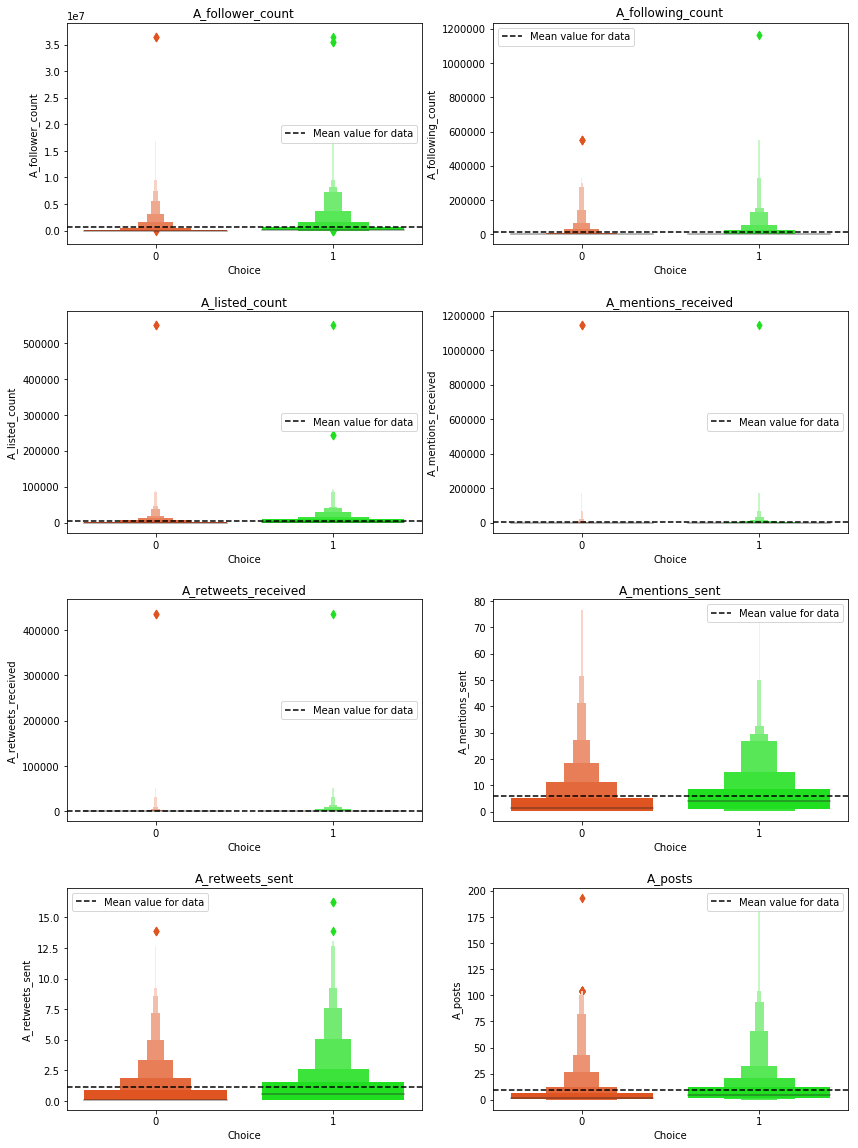

In [123]:
columns = [x for x in data.columns if x not in ["Choice"]]
length  = len(columns)
plt.figure(figsize=(14,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(4,2,j+1)
    sns.lvplot(x=data["Choice"],y=data[i],palette=["orangered","lime"])
    plt.title(i)
    plt.subplots_adjust(hspace=.3)
    plt.axhline(data[i].mean(),linestyle = "dashed",color ="k",label ="Mean value for data")
    plt.legend(loc="best")

print ("BOXPLOT FOR VARIABLES IN DATA SET WITH TARGET CLASS")


Area plot to target Classes

Text(0.5,1,'Area plot for attributes for 1 vs 0')

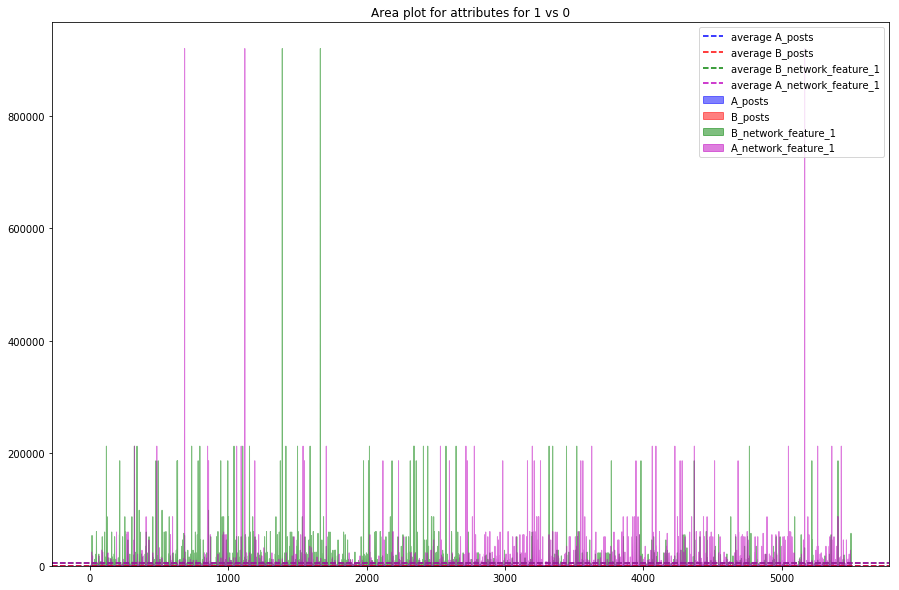

In [61]:
st = data[data["Choice"] == 1].reset_index()
nst= data[data["Choice"] == 0].reset_index()
new = pd.concat([nst,st]).reset_index()

plt.figure(figsize=(15,10))
plt.stackplot(new.index,new["A_posts"],alpha =.5,color="b",labels=["A_posts"])
plt.stackplot(new.index,new["B_posts"],alpha=.5,color="r",labels=["B_posts"])
plt.stackplot(new.index,new["B_network_feature_1"],alpha=.5,color ="g",labels=["B_network_feature_1"])
plt.stackplot(new.index,new["A_network_feature_1"],alpha=.5,color = "m",labels=["A_network_feature_1"])
#plt.axvline(x=16259,color = "black",linestyle="dashed",label = "separating 1 vs 0")
plt.axhline(new["A_posts"].mean(),color = "b",linestyle="dashed",label = "average A_posts")
plt.axhline(new["B_posts"].mean(),color = "r",linestyle="dashed",label = "average B_posts")
plt.axhline(new["B_network_feature_1"].mean(),color = "g",linestyle="dashed",label = "average B_network_feature_1")
plt.axhline(new["A_network_feature_1"].mean(),color = "m",linestyle="dashed",label = "average A_network_feature_1")
plt.legend(loc="best")
plt.title("Area plot for attributes for 1 vs 0")

3D Analysis for Variables to target class

Text(0.5,0.92,'3D PLOT FOR CHOICE VS A_RETWEETS_RECEIVED VS A_FOLLOWER_COUNT')

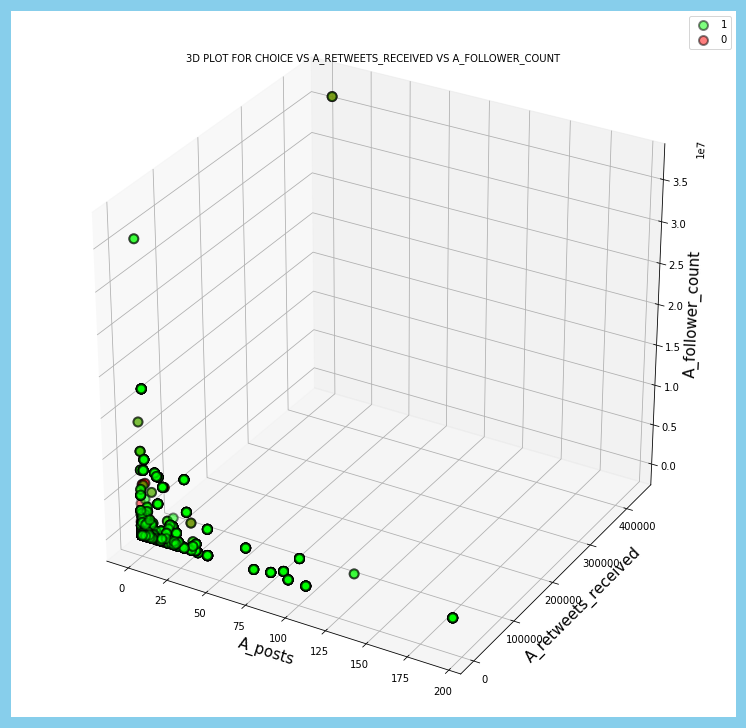

In [62]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(13,13))
ax  = fig.add_subplot(111,projection = "3d")

ax.scatter(data[data["Choice"] == 1][["A_posts"]],data[data["Choice"] == 1][["A_retweets_received"]],data[data["Choice"] == 1][["A_follower_count"]],
           alpha=.5,s=80,linewidth=2,edgecolor="k",color="lime",label="1")
ax.scatter(data[data["Choice"] == 0][["A_posts"]],data[data["Choice"] == 0][["A_retweets_received"]],data[data["Choice"] == 0][["A_follower_count"]],
           alpha=.5,s=80,linewidth=2,edgecolor="k",color="r",label="0")

ax.set_xlabel("A_posts",fontsize=15)
ax.set_ylabel("A_retweets_received",fontsize=15)
ax.set_zlabel("A_follower_count",fontsize=15)
plt.legend(loc="best")
fig.set_facecolor("skyblue")
plt.title("3D PLOT FOR CHOICE VS A_RETWEETS_RECEIVED VS A_FOLLOWER_COUNT",fontsize=10)

Text(0.5,0.92,'3D PLOT FOR CHOICE VS B_RETWEETS_RECEIVED VS B_FOLLOWER_COUNT')

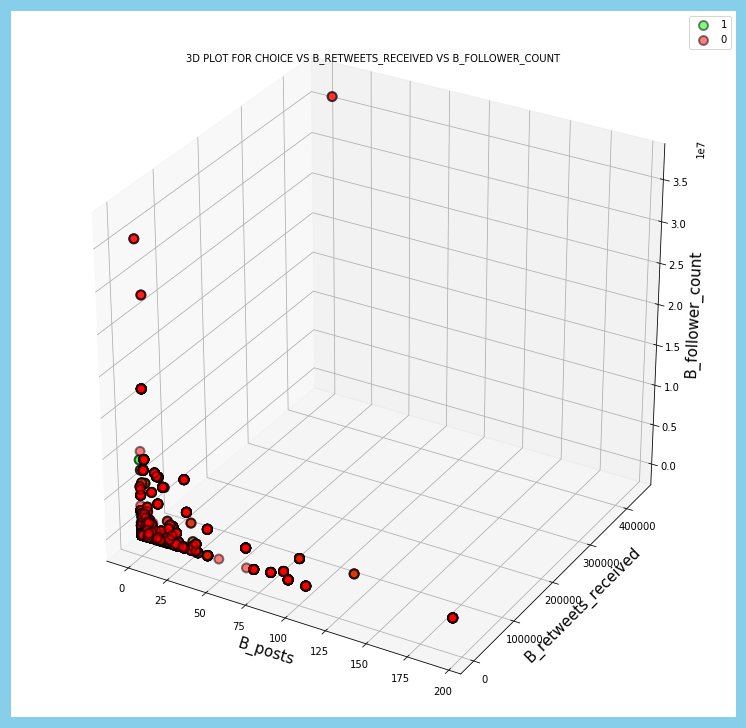

In [63]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(13,13))
ax  = fig.add_subplot(111,projection = "3d")

ax.scatter(data[data["Choice"] == 1][["B_posts"]],data[data["Choice"] == 1][["B_retweets_received"]],data[data["Choice"] == 1][["B_follower_count"]],
           alpha=.5,s=80,linewidth=2,edgecolor="k",color="lime",label="1")
ax.scatter(data[data["Choice"] == 0][["B_posts"]],data[data["Choice"] == 0][["B_retweets_received"]],data[data["Choice"] == 0][["B_follower_count"]],
           alpha=.5,s=80,linewidth=2,edgecolor="k",color="r",label="0")

ax.set_xlabel("B_posts",fontsize=15)
ax.set_ylabel("B_retweets_received",fontsize=15)
ax.set_zlabel("B_follower_count",fontsize=15)
plt.legend(loc="best")
fig.set_facecolor("skyblue")
plt.title("3D PLOT FOR CHOICE VS B_RETWEETS_RECEIVED VS B_FOLLOWER_COUNT",fontsize=10)

Density plot between A_posts and A_retweets_received

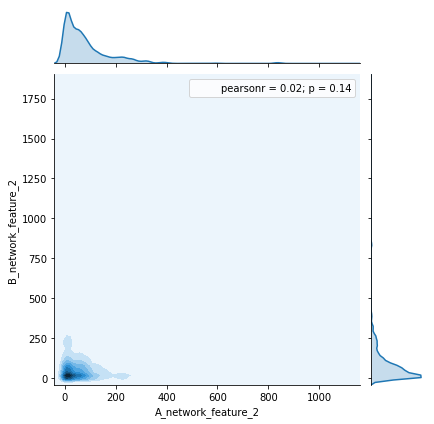

In [70]:
sns.jointplot(data["A_network_feature_2"],data["B_network_feature_2"],kind="kde")

Text(0.5,1,'Bubble plot for B_retweets_sent,B_network_feature_2 and B_following_count')

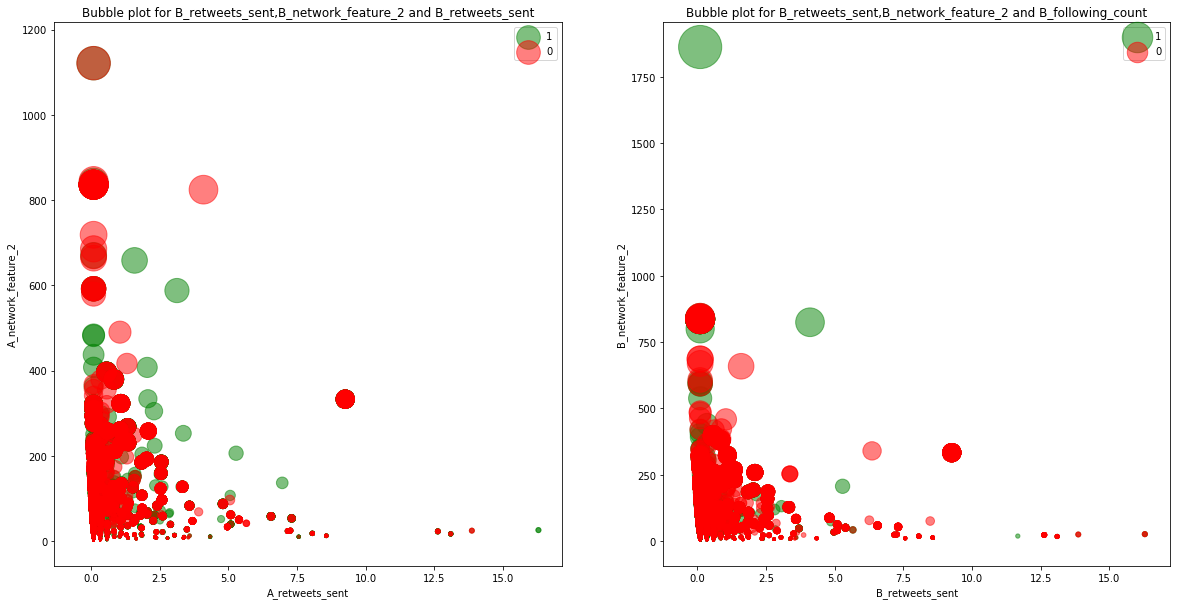

In [76]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.scatter(st["A_retweets_sent"],st["A_network_feature_2"],alpha=.5,s=st["A_network_feature_2"],linewidths=1,color="g",label="1")
plt.scatter(nst["A_retweets_sent"],nst["A_network_feature_2"],alpha=.5,s=nst["A_network_feature_2"],linewidths=1,color="r",label="0")
plt.legend(loc="best")
plt.xlabel("A_retweets_sent")
plt.ylabel("A_network_feature_2")
plt.title("Bubble plot for B_retweets_sent,B_network_feature_2 and B_retweets_sent")


plt.subplot(122)
plt.scatter(st["B_retweets_sent"],st["B_network_feature_2"],alpha=.5,s=st["B_network_feature_2"],linewidths=1,color="g",label="1")
plt.scatter(nst["B_retweets_sent"],nst["B_network_feature_2"],alpha=.5,s=nst["B_network_feature_2"],linewidths=1,color="r",label="0")
plt.legend(loc="best")
plt.xlabel("B_retweets_sent")
plt.ylabel("B_network_feature_2")
plt.title("Bubble plot for B_retweets_sent,B_network_feature_2 and B_following_count")

visualizing the distribution of the variables for the target class

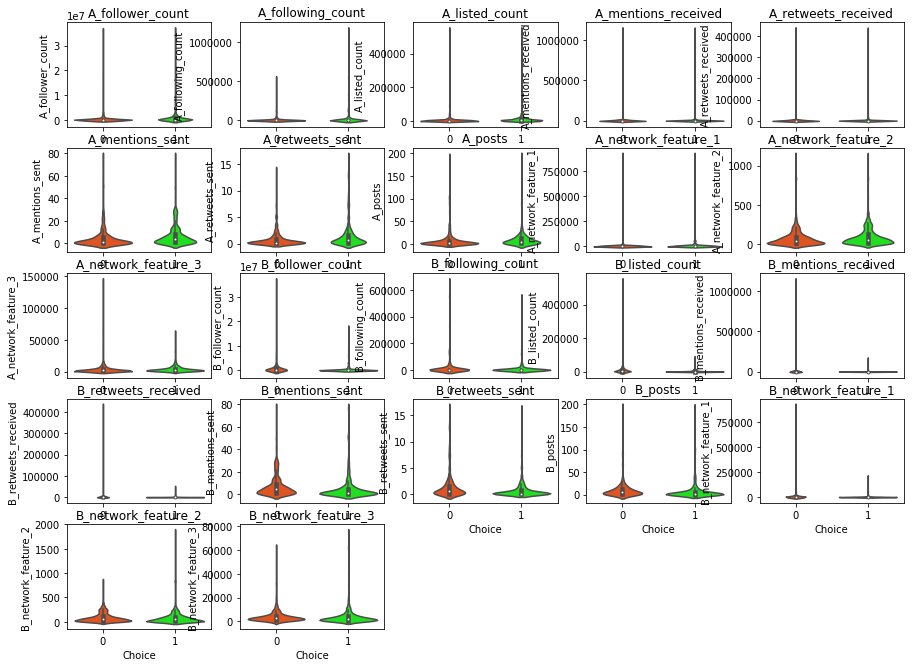

In [91]:

columns = [x for x in data.columns if x not in ["Choice"]]
length  = len(columns)

plt.figure(figsize=(15,25))

for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(length/2,length/4,j+1)
    sns.violinplot(x=data["Choice"],y=data[i],palette=["Orangered","lime"],alpha=.5)
    plt.title(i)

plt.figure(figsize=(800,40))

Text(0,0.5,'')

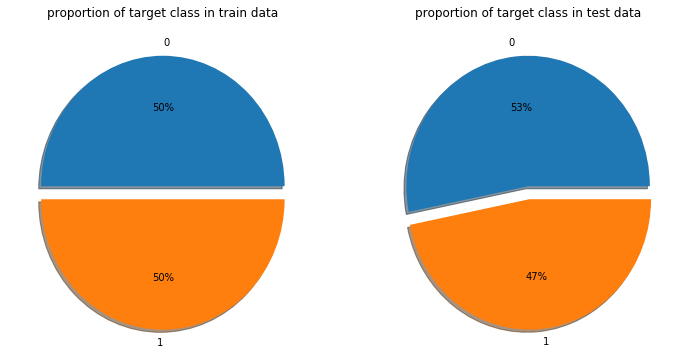

In [96]:
from sklearn.model_selection import train_test_split

train , test = train_test_split(data,test_size = .3,random_state = 123)

plt.figure(figsize=(12,6))
plt.subplot(121)
train["Choice"].value_counts().plot.pie(labels = ["0","1"],autopct = "%1.0f%%",shadow = True,explode=[0,.1])
plt.title("proportion of target class in train data")
plt.ylabel("")
plt.subplot(122)
test["Choice"].value_counts().plot.pie(labels = ["0","1"],autopct = "%1.0f%%",shadow = True,explode=[0,.1])
plt.title("proportion of target class in test data")
plt.ylabel("")

In [97]:
# Split the original data into train and test. 

from sklearn import model_selection 

dataSize = data.shape[0]
print("El archivo contiene: ",dataSize)

percentage = 0.30 

xTrain,xTest,yTrain,yTest = model_selection.train_test_split(data.iloc[:,1:],data.iloc[:,0],test_size=percentage,random_state=22)

El archivo contiene:  5500


Model function to run algorithms

In [117]:
#MODEL FUNCTION

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

def model(algorithm,dtrain_x,dtrain_y,dtest_x,dtest_y,of_type):
    
    print ("*****************************************************************************************")
    print ("MODEL - OUTPUT")
    print ("*****************************************************************************************")
    algorithm.fit(dtrain_x,dtrain_y)
    predictions = algorithm.predict(dtest_x)
    
    print (algorithm.predict(dtest_x))
    print (algorithm)
    print ("\naccuracy_score :",accuracy_score(dtest_y,predictions))
    
    print ("\nclassification report :\n",(classification_report(dtest_y,predictions)))
        
    plt.figure(figsize=(14,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(dtest_y,predictions),annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=20)
    
    predicting_probabilites = algorithm.predict_proba(dtest_x)[:,1]
    fpr,tpr,thresholds = roc_curve(dtest_y,predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
    
    if  of_type == "feat":
        
        dataframe = pd.DataFrame(algorithm.feature_importances_,dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
    
    elif of_type == "coef" :
        
        dataframe = pd.DataFrame(algorithm.coef_.ravel(),dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
            
    elif of_type == "none" :
        return (algorithm)




 Perform a forward-backward feature selection based on p-value

In [119]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm

X = xTrain
y = yTrain


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  B_listed_count                 with p-value 4.06978e-33
Add  A_listed_count                 with p-value 4.47078e-31
Add  A_mentions_received            with p-value 7.7054e-16
Add  B_retweets_sent                with p-value 1.639e-16
Add  A_mentions_sent                with p-value 3.69445e-14
Add  A_network_feature_1            with p-value 4.90116e-12
Add  A_network_feature_3            with p-value 1.38601e-12
Add  B_network_feature_3            with p-value 2.86458e-08
Add  B_retweets_received            with p-value 4.27184e-05
Add  B_network_feature_1            with p-value 1.39233e-10
Add  B_follower_count               with p-value 1.66872e-07
Add  A_follower_count               with p-value 0.000148333
Add  B_mentions_sent                with p-value 0.000134803
Add  A_retweets_sent                with p-value 0.00842339
resulting features:
['B_listed_count', 'A_listed_count', 'A_mentions_received', 'B_retweets_sent', 'A_mentions_sent', 'A_network_feature_1', 'A_networ

# Predictive Models

Random Forest Classifier

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
[0 0 1 ..., 0 0 0]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

accuracy_score : 0.76

classification report :
              precision    recall  f1-score   support

          0       0.75      0.77      0.76       819
          1       0.77      0.75      0.76       831

avg / total       0.76      0.76      0.76      1650



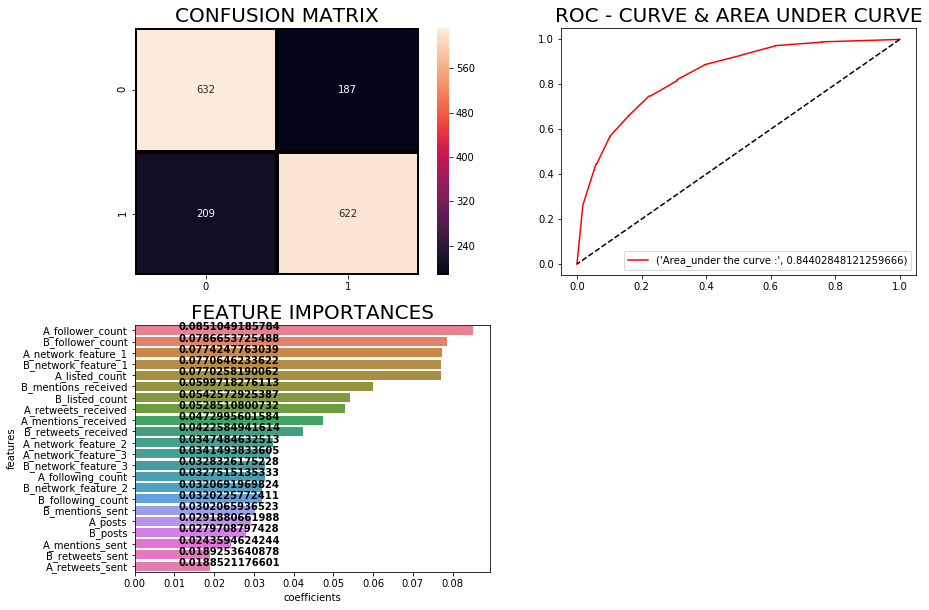

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
model(rf,xTrain,yTrain,xTest,yTest,"feat")

Logistic Regression

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
[0 0 1 ..., 0 0 1]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

accuracy_score : 0.74303030303

classification report :
              precision    recall  f1-score   support

          0       0.76      0.71      0.73       819
          1       0.73      0.78      0.75       831

avg / total       0.74      0.74      0.74      1650



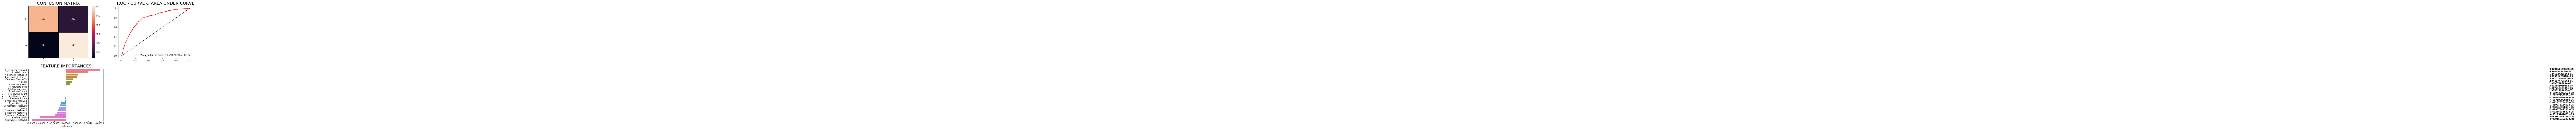

In [118]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
model(log,xTrain,yTrain,xTest,yTest,"coef")

Gradient Boosting Classifier

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
[0 0 0 ..., 0 0 1]
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

accuracy_score : 0.778787878788

classification report :
              precision    recall  f1-score   support

          0       0.80      0.74      0.77       819
          1       0.76      0.81      0.79       831

avg / total       0.78      0.78      0.78      1650



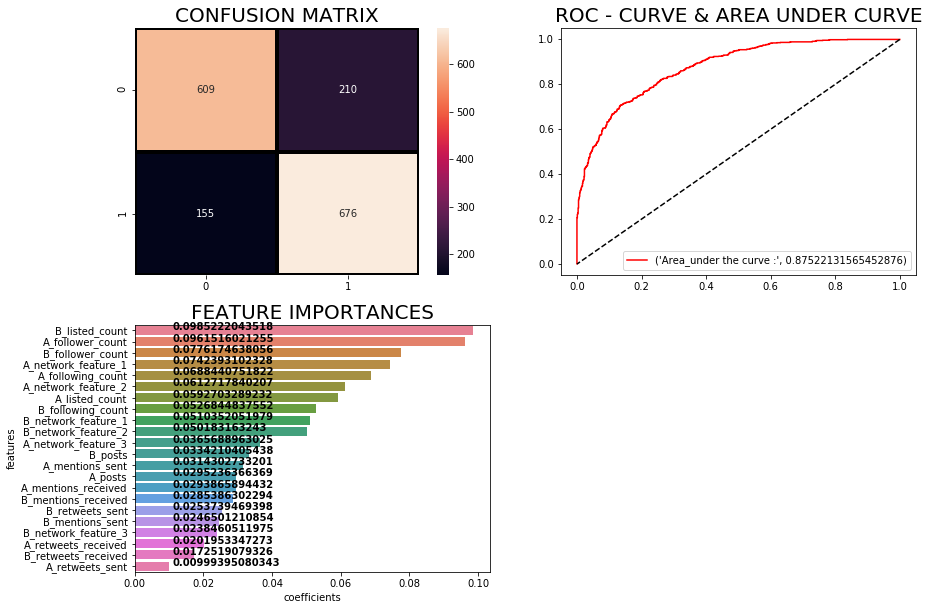

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.001, n_estimators=10000, subsample=1.0, 
                                 min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, 
                                 random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False)
model(gbc,xTrain,yTrain,xTest,yTest,"feat")

In [26]:
# Random Forest Classifier. 

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=2,n_estimators=100, random_state=0)

rfc.fit(xTrain, yTrain)

predictions = rfc.predict(xTest)

In [27]:
# Confusion matrix.
pd.crosstab(yTest, predictions)

col_0     0    1
Choice          
0       608  211
1       182  649

In [30]:
# Calculating the AUC score. 
from sklearn import metrics 
metrics.roc_curve(yTest, predictions)
metrics.roc_auc_score(yTest, predictions)

0.7616777526524818

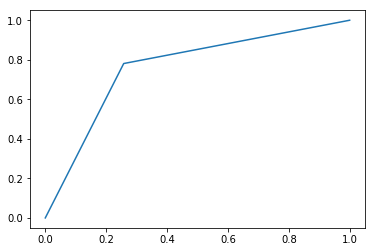

In [34]:
# Plot the ROC curve.
%matplotlib inline
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(yTest, predictions)
plt.plot(fpr,tpr)

In [8]:
# Validation data to upload results to kaggle.

validation = pd.read_csv("./datasets/test.csv",sep=",")
validation.head()

A_follower_count  A_following_count  A_listed_count  A_mentions_received  \
0            614689                400            5729           199.618296   
1            739581              10723            1279           102.026750   
2              3638               3341              85             2.793577   
3               613               1259              31             1.326041   
4           1352348                331           15647         19129.848662   

   A_retweets_received  A_mentions_sent  A_retweets_sent    A_posts  \
0            67.812469         9.366192         0.359534   4.094488   
1            96.771319         1.537322         1.054358   3.467754   
2             1.402703         2.594089         0.598150   3.802143   
3             0.356943         6.249678         2.323064   7.488116   
4         14552.733991         2.065418         0.580955  16.281502   

   A_network_feature_1  A_network_feature_2         ...           \
0                  669            39.193741         ...            
1                  432            11.191686         ...            
2                   11             9.416667         ...            
3                    4             5.000000         ...            
4                52580             3.092448         ...            

   B_following_count  B_listed_count  B_mentions_received  \
0                563           20057           967.720642   
1              12949            1311            38.260522   
2                320            3673          1207.190077   
3               3599            1072            10.300222   
4             147521           15043          9902.070379   

   B_retweets_received  B_mentions_sent  B_retweets_sent     B_posts  \
0           579.431128         4.473798         0.805680    6.241806   
1            10.697567        12.845793         1.584284   12.106662   
2           599.721600         0.842022         0.593199    7.044735   
3             3.828561         1.624092         0.100503    1.614287   
4          5012.055876        10.438460         0.100503  193.072418   

   B_network_feature_1  B_network_feature_2  B_network_feature_3  
0                 4027            57.643839          3201.293706  
1                  144           209.717241         21496.565517  
2                 3918             7.859818           637.983300  
3                   43           113.840909          2537.772727  
4                28564            10.964144          1035.955493  

[5 rows x 22 columns]